# Problemas de optimización escalar
Resuelva los siguientes problemas usando la librería `SymPy`. Use celdas en `Markdown` para explicar su procedimiento, así como los resultados obtenidos.

In [2]:
# Primero importamos las librerías
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

1. El perímetro de un triángulo isósceles es de $10 cm$. ¿Cuánto deben medir sus lados para que el volumen del cuerpo generado por la rotación del triángulo en torno a su base sea el mayor posible? (Volumen de un cono $= \frac{1}{3}\pi r^2 h$, donde $r$ es el radio de la base y $h$ la altura del cono).

**Razonamiento:**

Si se quiere maximizar el sólido de revolución que se proyectará al rotar el triángulo isósceles conociendo su perímetro, partimos de la relación de perímetro para un triángulo isósceles donde:
$$
Perímetro = 2L + B = 10
$$
Donde $L$ es el largo de cada lado (hay 2 iguales) y $B$ es la base del triángulo.
Además, conocemos que $B = 2r$, por lo tanto, $L + r = 5$, despejando:
$$r = 5 - L$$
Otra relación que nos puede resultar útil es el teorema de pitágoras, que nos dice que $L^2 = r^2 + h^2$ de forma que despejamos $h = \sqrt{L^2 - r^2}$ y reemplazamos $r$:
$$h = \sqrt{L^2 - (5 - L)^2}$$
Ahora tomamos nuestros despejes para r y para h, y los reemplazamos en la ecuación de volúmen:
$$
V_{max} = \frac{\pi(5-L)^2\sqrt{L^2 - (5 - L)^2}}{3}
$$

In [3]:
'''Ahora si comenzamos con el planteamiento de la ecuación y la solución numérica.'''
# Declaramos la varible simbólica
L = sym.var('L')
V = (sym.pi*(5-L)**2*sym.sqrt(L**2 - (5-L)**2))/3
V_num = sym.lambdify(L, V, 'numpy')
V

pi*(5 - L)**2*sqrt(L**2 - (5 - L)**2)/3

In [4]:
# Ahora diferenciamos para encontrar los puntos críticos y para evaluar el criterio de la segunda derivada
V_diff = sym.diff(V, L)
V_diff2 = sym.diff(V_diff, L)
V_diff2_num = sym.lambdify(L, V_diff2, 'numpy')

In [5]:
# Encontramos los puntos críticos
c = sym.solve(V_diff, L)
c

[3, 5]

In [6]:
# Buscamos saber cuál es el máximo y el mínimo
for i in c:
  try:
    if V_diff2_num(i) < 0:
      print(f'El punto crítico {i} es un máximo')
    elif V_diff2_num(i) > 0:
      print(f'El punto crítico {i} es un mínimo')
  except:
     print(f'El punto crítico {i} no aplica para el cirterio de la segunda derivada')

El punto crítico 3 no aplica para el cirterio de la segunda derivada
El punto crítico 5 no aplica para el cirterio de la segunda derivada


<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return (1/3)*pi*(5 - L)**2*sqrt(L**2 - (5 - L)**2)


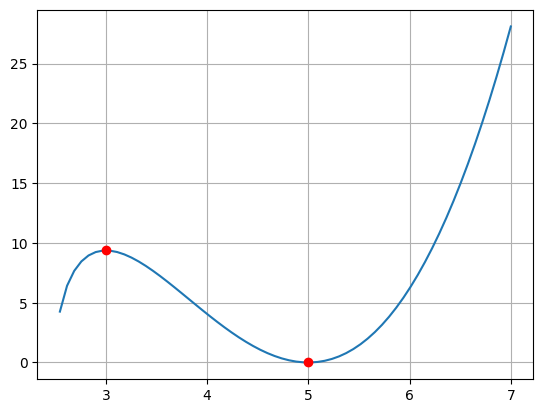

In [7]:
# Como no funcionó dicho criterio, graficamos.
x_num = np.linspace(0, 7, 100)
y_num = V_num(x_num)
plt.plot(x_num, y_num)
plt.plot(float(c[0]), V_num(float(c[0])), 'ro')
plt.plot(float(c[1]), V_num(float(c[1])), 'ro')
plt.grid()
plt.show()

In [8]:
print(f'Los puntos críticos son {c}, donde {c[0]} es un máximo, y {c[1]} un mínimo.')

Los puntos críticos son [3, 5], donde 3 es un máximo, y 5 un mínimo.


2. Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol. Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?

**Razonamiento:**

Si lo que se busca maximizar el área de la portería en base a la cantidad de material que tenemos para armarla, primero debemos plantear las funciones:

$$ Perímetro = 6 = 2L + T $$

En donde $L$ es cada lado de la portería y $T$ el travesaño o techo de esta.

Si lo que queremos es maximizar el área planteamos la ecuación donde $A = LT$, entonces dejamos la ecuación en función de una sola variable.

$$ A_{max} = L(6-2L) $$

Ahora me daré el lujo de saltarme el detalle en los comentarios del código y directamente hacer los procedimientos.

In [10]:
# Comenzamos con la optimización:
L = sym.var('L')
def maxA(L):
  return L*(6-2*L)
maxA(L)

L*(6 - 2*L)

In [14]:
dL = sym.diff(maxA(L), L)
d2L = sym.diff(dL, L)
dL

6 - 4*L

In [15]:
c2 = sym.solve(dL, L)
c2

[3/2]

In [16]:
for i in c2:
  try:
    if maxA(i) < 0:
      print(f'El punto crítico {i} es un máximo')
    elif maxA(i) > 0:
      print(f'El punto crítico {i} es un mínimo')
  except:
     print(f'El punto crítico {i} no aplica para el cirterio de la segunda derivada')

El punto crítico 3/2 es un mínimo


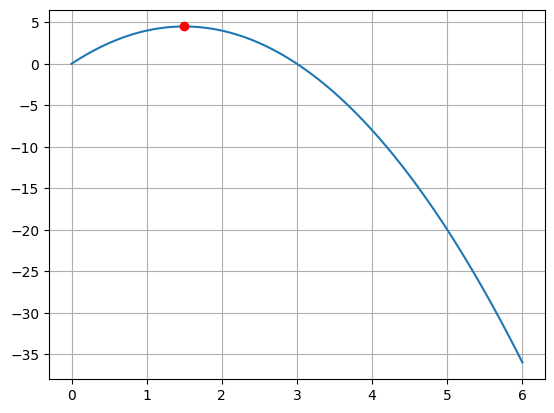

In [19]:
x_num2 = np.linspace(0, 6, 100)
y_num2 = maxA(x_num2)
plt.plot(x_num2, y_num2)
plt.plot(float(c2[0]), maxA(float(c2[0])), 'ro')
plt.grid()
plt.show()

**Resultados:**

Obtuvimos que el Largo de cada lado para maximizar el área debe ser de 1.5 metros, y por lo tanto el travesaño debe ser de 3 metros, y de esta forma se maximiza el área de la portería.